In [1]:
import os
from openai import OpenAI
import os

client = OpenAI(
    api_key=os.getenv("DASHSCOPE_API_KEY"), 
    base_url="https://dashscope.aliyuncs.com/compatible-mode/v1",
)

completion = client.chat.completions.create(
    model="qwen-vl-max", #qwen-vl-plus
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text", "text": "这是什么"},
                {"type": "image_url","image_url": {"url": "https://dashscope.oss-cn-beijing.aliyuncs.com/images/dog_and_girl.jpeg"}}
            ]
        }
        ]
    )
print(completion.model_dump_json())

{"id":"chatcmpl-03aaa75a-4f1a-911e-85f0-d3bbca8f0cc1","choices":[{"finish_reason":"stop","index":0,"logprobs":null,"message":{"content":"这是一张在海滩上拍摄的照片，照片中有一个人和一只狗。具体描述如下：\n\n1. **人物**：照片中有一个女性，她坐在沙滩上，穿着格子衬衫和深色裤子，显得非常放松和开心。\n2. **狗狗**：她旁边有一只金毛犬，戴着彩色的项圈。狗狗前爪抬起，似乎在和女性互动，像是在“握手”或玩耍。\n3. **背景**：背景是海滩和海洋，阳光明媚，可能是日出或日落时分，光线柔和，营造出温馨的氛围。\n\n这张照片传达了一种人与宠物之间的亲密关系和愉快的时光，展现了自然美景和和谐的生活场景。","refusal":null,"role":"assistant","annotations":null,"audio":null,"function_call":null,"tool_calls":null}}],"created":1751523801,"model":"qwen-vl-max","object":"chat.completion","service_tier":null,"system_fingerprint":null,"usage":{"completion_tokens":148,"prompt_tokens":1259,"total_tokens":1407,"completion_tokens_details":null,"prompt_tokens_details":{"audio_tokens":null,"cached_tokens":0}}}


In [2]:
messages = [
        {
            "role": "user",
            "content": [
                {"type": "text", "text": "框出图中轮毂的位置"},
                {"type": "image_url","image_url": {"url": "https://easycar.oss-cn-beijing.aliyuncs.com/car_undistorted.jpg"}}
            ]
        }
    ]

completion = client.chat.completions.create(
    model="qwen-vl-max-2024-08-09",
    messages=messages
    )
print(completion.model_dump_json())

{"id":"chatcmpl-79a9c248-bdf4-96d9-9fdc-2e73025122bd","choices":[{"finish_reason":"stop","index":0,"logprobs":null,"message":{"content":"好的，我已经在图中标出了轮毂的位置。","refusal":null,"role":"assistant","annotations":null,"audio":null,"function_call":null,"tool_calls":null}}],"created":1751523805,"model":"qwen-vl-max-0809","object":"chat.completion","service_tier":null,"system_fingerprint":null,"usage":{"completion_tokens":12,"prompt_tokens":369,"total_tokens":381,"completion_tokens_details":null,"prompt_tokens_details":null}}


In [3]:
#help(completion)

In [4]:
messages.append({'role': 'assistant', 'content': completion.choices[0].message.content})
messages.append({
            "role": "user",
            "content": [
                {"type": "text", "text": "图中轮毂的位置在哪里"},
                {"type": "image_url","image_url": {"url": "https://easycar.oss-cn-beijing.aliyuncs.com/car_undistorted.jpg"}}
            ]
        })
messages

[{'role': 'user',
  'content': [{'type': 'text', 'text': '框出图中轮毂的位置'},
   {'type': 'image_url',
    'image_url': {'url': 'https://easycar.oss-cn-beijing.aliyuncs.com/car_undistorted.jpg'}}]},
 {'role': 'assistant', 'content': '好的，我已经在图中标出了轮毂的位置。'},
 {'role': 'user',
  'content': [{'type': 'text', 'text': '图中轮毂的位置在哪里'},
   {'type': 'image_url',
    'image_url': {'url': 'https://easycar.oss-cn-beijing.aliyuncs.com/car_undistorted.jpg'}}]}]

In [5]:
completion = client.chat.completions.create(
    model="qwen-vl-plus",
    messages=messages
)     

print(completion.model_dump_json())

{"id":"chatcmpl-bf2bc8a0-bcbc-996a-abc2-3eb62e16c830","choices":[{"finish_reason":"stop","index":0,"logprobs":null,"message":{"content":"图中的轮毂位于汽车的后部，具体来说是在车辆的左后侧。你可以看到轮胎和轮毂的部分，它们安装在车轮上，支撑着车辆。轮毂通常是一个金属环，用于固定轮胎，并且通常带有装饰性的设计或标志。在这张图片中，可以看到轮毂的一部分，包括其边缘和中心区域。","refusal":null,"role":"assistant","annotations":null,"audio":null,"function_call":null,"tool_calls":null}}],"created":1751523816,"model":"qwen-vl-plus","object":"chat.completion","service_tier":null,"system_fingerprint":null,"usage":{"completion_tokens":76,"prompt_tokens":750,"total_tokens":826,"completion_tokens_details":null,"prompt_tokens_details":{"audio_tokens":null,"cached_tokens":0}}}


In [8]:
completion

ChatCompletion(id='chatcmpl-bf2bc8a0-bcbc-996a-abc2-3eb62e16c830', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='图中的轮毂位于汽车的后部，具体来说是在车辆的左后侧。你可以看到轮胎和轮毂的部分，它们安装在车轮上，支撑着车辆。轮毂通常是一个金属环，用于固定轮胎，并且通常带有装饰性的设计或标志。在这张图片中，可以看到轮毂的一部分，包括其边缘和中心区域。', refusal=None, role='assistant', annotations=None, audio=None, function_call=None, tool_calls=None))], created=1751523816, model='qwen-vl-plus', object='chat.completion', service_tier=None, system_fingerprint=None, usage=CompletionUsage(completion_tokens=76, prompt_tokens=750, total_tokens=826, completion_tokens_details=None, prompt_tokens_details=PromptTokensDetails(audio_tokens=None, cached_tokens=0)))

In [9]:
# 这里需要用到 autodl，调用Qwen-VL本地的模型
"""
from transformers import AutoModelForCausalLM, AutoTokenizer
# Note: The default behavior now has injection attack prevention off.
tokenizer = AutoTokenizer.from_pretrained("/root/autodl-tmp/model/Qwen/Qwen-VL-Chat", trust_remote_code=True)

query = tokenizer.from_list_format([
    #{'image': 'https://easycar.oss-cn-beijing.aliyuncs.com/2.jpg'}, # Either a local path or an url
    {'image': 'https://easycar.oss-cn-beijing.aliyuncs.com/car_undistorted.jpg'},
    {'text': '这是什么?'},
])
response, history = model.chat(tokenizer, query=query, history=None)
print(response)
# 图中展示了一辆蓝色的特斯拉Model3轿车的尾部，从图中可以观察到车辆的尾部有部分凹陷和划痕，但无法确定是否为车辆被追尾。

response, history = model.chat(tokenizer, '框出图中轮毂的位置', history=history)
print(response)
# <ref>轮毂</ref><box>(154,553),(310,880)</box>
image = tokenizer.draw_bbox_on_latest_picture(response, history)
if image:
    image.save('wheel.jpg')
else:
    print("no box")
"""

'\nfrom transformers import AutoModelForCausalLM, AutoTokenizer\n# Note: The default behavior now has injection attack prevention off.\ntokenizer = AutoTokenizer.from_pretrained("/root/autodl-tmp/model/Qwen/Qwen-VL-Chat", trust_remote_code=True)\n\nquery = tokenizer.from_list_format([\n    #{\'image\': \'https://easycar.oss-cn-beijing.aliyuncs.com/2.jpg\'}, # Either a local path or an url\n    {\'image\': \'https://easycar.oss-cn-beijing.aliyuncs.com/car_undistorted.jpg\'},\n    {\'text\': \'这是什么?\'},\n])\nresponse, history = model.chat(tokenizer, query=query, history=None)\nprint(response)\n# 图中展示了一辆蓝色的特斯拉Model3轿车的尾部，从图中可以观察到车辆的尾部有部分凹陷和划痕，但无法确定是否为车辆被追尾。\n\nresponse, history = model.chat(tokenizer, \'框出图中轮毂的位置\', history=history)\nprint(response)\n# <ref>轮毂</ref><box>(154,553),(310,880)</box>\nimage = tokenizer.draw_bbox_on_latest_picture(response, history)\nif image:\n    image.save(\'wheel.jpg\')\nelse:\n    print("no box")\n'

In [14]:
"""
#response = '<ref>轮毂</ref><box>(100,460),(250,880)</box>'
#response = '<ref>轮毂</ref><box>(1,1),(1000,1000)</box>'
image = tokenizer.draw_bbox_on_latest_picture(response, history)
if image:
    image.save('wheel.jpg')
else:
    print("no box")
"""

In [3]:
"""
response, history = model.chat(tokenizer, '框出图中凹陷和划痕的位置', history=history)
print(response)
image = tokenizer.draw_bbox_on_latest_picture(response, history)
if image:
    image.save('car_damage.jpg')
else:
    print("no box")
"""

<ref>凹陷和划痕</ref><box>(240,606),(564,863)</box>


In [2]:
import gradio
gradio.__version__
import transformers 
transformers.__version__
import torch
torch.__version__

'2.0.0+cu118'

In [3]:
"""
# 第1轮对话
query = tokenizer.from_list_format([
    {'image': 'https://qianwen-res.oss-cn-beijing.aliyuncs.com/Qwen-VL/assets/demo.jpeg'}, # Either a local path or an url
    {'text': '这是什么?'},
])
response, history = model.chat(tokenizer, query=query, history=None)
print(response)
# 图中是一名女子在沙滩上和狗玩耍，旁边是一只拉布拉多犬，它们处于沙滩上。
"""

图中是一名女子在沙滩上和狗玩耍，旁边的狗是一只拉布拉多犬，它们处于沙滩上。


In [4]:
"""
# 第1轮对话
query = tokenizer.from_list_format([
    {'image': 'https://vl-image.oss-cn-shanghai.aliyuncs.com/1.jpg'}, 
    {'text': '这是什么？'},
])
response, history = model.chat(tokenizer, query=query, history=None)
print(response)
"""

图中是太阳能电池板堆叠在托盘上，用塑料薄膜包裹着，准备运往国外。


In [3]:
"""
# 第2轮对话
response, history = model.chat(tokenizer, '框出图中包装有缺陷的位置', history=history)
print(response)
# <ref>击掌</ref><box>(536,509),(588,602)</box>
image = tokenizer.draw_bbox_on_latest_picture(response, history)
if image:
    image.save('2.jpg')
else:
    print("no box")
"""

<ref>包装有缺陷</ref><box>(269,61),(811,986)</box>


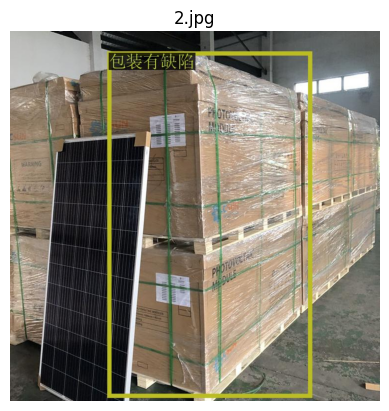

In [9]:
"""
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 读取图像
img = mpimg.imread('2.jpg')
# 显示图像
plt.imshow(img)
# 添加标题
plt.title('2.jpg')
# 隐藏坐标轴
plt.axis('off')
# 显示图像
plt.show()
"""

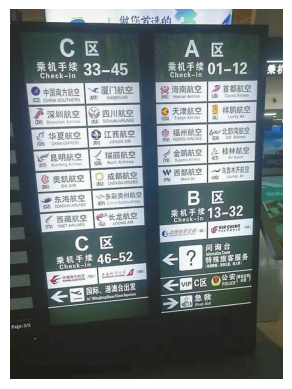

厦门航空在C区。
A区有国航、海航、厦航、祥鹏航空、川航、东方航空、南方航空、西部航空、澜湄航空、多哥非洲航空、哈萨克斯坦阿克姆航空、肯尼亚航空、英国航空、奥地利航空、摩洛哥皇家航空、泰国国际航空、越南航空、龙江航空、红土航空、长龙航空、北部湾航空、陕西航空、缅甸国际航空、澳门航空、桂林航空、奥伦航空、以色列航空、澳门航空、哈萨克斯坦航空、塔什干国际航空、阿曼航空、巴基斯坦国际航空、英国航空、约旦航空、也门航空、奥地利航空、塞尔维亚航空、孟加拉国航空、国泰航空、中亚航空、阿富汗国际航空、澳门航空、马斯航空、吉祥航空、东海航空、奥普航空、川航、河北航空、红航空、天骄航空、西藏航空、揭阳航空、乌鲁木齐航空、长安航空、北部湾航空、象山航空、东海航空、长安航空、四川航空、西部航空、澜湄航空、多哥非洲航空、哈萨克斯坦阿克姆航空、肯尼亚航空、英国航空、奥地利航空、摩洛哥皇家航空、泰国国际航空、越南航空、龙江航空、红土航空、长龙航空、北部湾航空、陕西航空、缅甸国际航空、川航空客319、川航空客321、川航空客320、川航空客321、川航空客319、川航空客321、川航空客320、川航空客321、川航空客319、川航空客321、川航空客320、川航空客321、川航空客319、川航空客321、川航空客320、川航空客321、川航空客319、川航空客321、川航空客320、川航空客321、川航空客319、川航空客321、川航空客320、川航空客321、川航空客319、川航空客321、川航空客320、川航空客321、川航空客319、川航空客321、川航空客320、川


In [10]:
"""
# 读取图像
img = mpimg.imread('3.jpg')
# 显示图像
plt.imshow(img)
# 隐藏坐标轴
plt.axis('off')
# 显示图像
plt.show()

# 第1轮对话
query = tokenizer.from_list_format([
    {'image': 'https://vl-image.oss-cn-shanghai.aliyuncs.com/3.jpg'}, 
    {'text': '厦门航空在哪个区？'}, 
])
response, history = model.chat(tokenizer, query=query, history=None)
print(response)

# 第1轮对话
query = tokenizer.from_list_format([
    {'image': 'https://vl-image.oss-cn-shanghai.aliyuncs.com/3.jpg'}, 
    {'text': 'A区有哪些航空公司？'},
])
response, history = model.chat(tokenizer, query=query, history=None)
print(response)

# 第2轮对话
"""

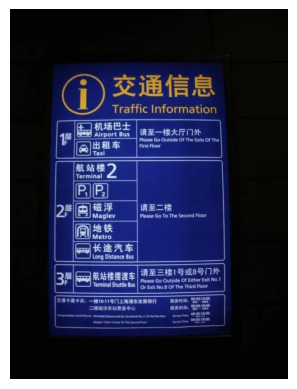

机场巴士在第二层。


In [11]:
"""
# 读取图像
img = mpimg.imread('4.jpg')
# 显示图像
plt.imshow(img)
# 隐藏坐标轴
plt.axis('off')
# 显示图像
plt.show()

# 第1轮对话
query = tokenizer.from_list_format([
    {'image': 'https://vl-image.oss-cn-shanghai.aliyuncs.com/4.jpg'}, 
    {'text': '机场巴士在第几层？'}, 
])
response, history = model.chat(tokenizer, query=query, history=None)
print(response)
"""

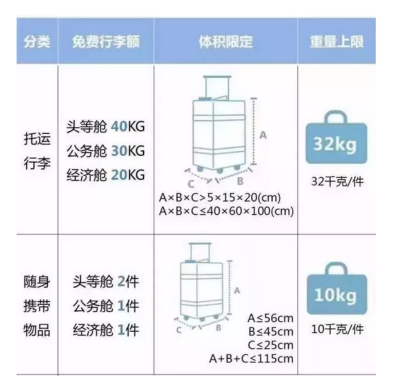

头等舱可以免费携带30KG的行李。


In [12]:
"""
# 读取图像
img = mpimg.imread('5.png')
# 显示图像
plt.imshow(img)
# 隐藏坐标轴
plt.axis('off')
# 显示图像
plt.show()

# 第1轮对话
query = tokenizer.from_list_format([
    {'image': 'https://vl-image.oss-cn-shanghai.aliyuncs.com/5.png'}, 
    {'text': '头等舱免费行李额是多少KG？'}, 
])
response, history = model.chat(tokenizer, query=query, history=None)
print(response)
"""